## CMPINF 2110 Spring 2022 - Week 02

### PRACTICE Covid19 data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Data

Let's see TIDY DATA "in the wild"!

The data comes from the NY Times COVID-19 Github page:

https://github.com/nytimes/covid-19-data

This is a huge data set...so we will first read in a small number of rows...

In [2]:
data_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'

In [3]:
usa_few = pd.read_csv( data_url, nrows = 11 )

In [4]:
usa_few.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    11 non-null     object
 1   county  11 non-null     object
 2   state   11 non-null     object
 3   fips    11 non-null     int64 
 4   cases   11 non-null     int64 
 5   deaths  11 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 656.0+ bytes


In [5]:
usa_few

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
5,2020-01-25,Orange,California,6059,1,0
6,2020-01-25,Cook,Illinois,17031,1,0
7,2020-01-25,Snohomish,Washington,53061,1,0
8,2020-01-26,Maricopa,Arizona,4013,1,0
9,2020-01-26,Los Angeles,California,6037,1,0


In [6]:
usa_few.nunique()

date      6
county    5
state     4
fips      5
cases     1
deaths    1
dtype: int64

The `fips` and `deaths` are integers. So the MODULUS or REMAINDER from dividing by 1 is ZERO.

In [7]:
usa_few.deaths%1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: deaths, dtype: int64

Now read in the whole data set.

In [8]:
usa = pd.read_csv( data_url )

In [9]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   date        object 
 2   county      object 
 3   state       object 
 4   fips        float64
 5   cases       int64  
 6   deaths      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 133.7+ MB


Wait...`deaths` and `fips` are no longer integers...the data type changed?!?!

Check some rows.

In [10]:
usa.loc[ usa.fips%1 != 0 ]

,Unnamed: 0,date,county,state,fips,cases,deaths
416,416,2020-03-01,New York City,New York,NaN,1,0.0
418,418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
448,448,2020-03-02,New York City,New York,NaN,1,0.0
450,450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
482,482,2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...,...
2501996,2501996,2022-05-13,Unknown,Rhode Island,NaN,31231,17.0
2502197,2502197,2022-05-13,Unknown,Tennessee,NaN,19465,306.0
2502485,2502485,2022-05-13,Unknown,Utah,NaN,4044,92.0
2502502,2502502,2022-05-13,Unknown,Vermont,NaN,1496,2.0


Check some of the rows based on `deaths`.

In [11]:
usa.loc[ usa.deaths%1 != 0 ]

,Unnamed: 0,date,county,state,fips,cases,deaths
117486,117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN
117487,117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN
117488,117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN
117489,117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN
117490,117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN
...,...,...,...,...,...,...,...
2501987,2501987,2022-05-13,Vega Baja,Puerto Rico,72145.0,11916,NaN
2501988,2501988,2022-05-13,Vieques,Puerto Rico,72147.0,935,NaN
2501989,2501989,2022-05-13,Villalba,Puerto Rico,72149.0,3999,NaN
2501990,2501990,2022-05-13,Yabucoa,Puerto Rico,72151.0,5508,NaN


So the MISSING values appear to have impacted the data type!

In [ ]:
usa.isna().sum()

In [ ]:
usa.loc[ usa.fips%1 != 0].shape

In [12]:
usa.loc[ usa.deaths%1 != 0].shape

(57605, 7)

Tidy data does NOT mean there are no MISSINGS! 

With Pandas the difference between an integer and a float is not that big of a deal. Later when we get to SQL...that will NOT be the case!

## Data Structure

One row in the data set corresponds to a county within a State within on a given day. The characteristics we are recording are the number or count of cases and deaths on each day within that county in that state.

In [13]:
usa

,Unnamed: 0,date,county,state,fips,cases,deaths
0,0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...,...
2502827,2502827,2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2502828,2502828,2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2502829,2502829,2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2502830,2502830,2022-05-13,Washakie,Wyoming,56043.0,2358,44.0


What's the data type of the `date` column?

In [14]:
usa.dtypes

Unnamed: 0      int64
date           object
county         object
state          object
fips          float64
cases           int64
deaths        float64
dtype: object

It's a string! The `date` therefore does not "know" May vs October. It does not know the first of the month vs the last date of the month. It does not "know" what day comes after Jan 31. However...the DATETIME class does!!!!

## Date to datetime

Start with the small data set so it's easy to look at. Notice there is a common pattern! 

YYYY-MM-DD

In [15]:
usa_few.date

0     2020-01-21
1     2020-01-22
2     2020-01-23
3     2020-01-24
4     2020-01-24
5     2020-01-25
6     2020-01-25
7     2020-01-25
8     2020-01-26
9     2020-01-26
10    2020-01-26
Name: date, dtype: object

Convert to a datetime object

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [16]:
pd.to_datetime( usa_few.date )

0    2020-01-21
1    2020-01-22
2    2020-01-23
3    2020-01-24
4    2020-01-24
5    2020-01-25
6    2020-01-25
7    2020-01-25
8    2020-01-26
9    2020-01-26
10   2020-01-26
Name: date, dtype: datetime64[ns]

In [17]:
usa_few['date_dt'] = pd.to_datetime( usa_few.date )

In [19]:
usa_few.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     11 non-null     object        
 1   county   11 non-null     object        
 2   state    11 non-null     object        
 3   fips     11 non-null     int64         
 4   cases    11 non-null     int64         
 5   deaths   11 non-null     int64         
 6   date_dt  11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 744.0+ bytes


The format looks the same...but the data type changed!!!! This is what matters!

We now have attributes associated with the datetime object!

In [20]:
usa_few.date_dt.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
Name: date_dt, dtype: int64

In [ ]:
usa_few.date_dt.dt.month

In [21]:
usa_few.date_dt.dt.day

0     21
1     22
2     23
3     24
4     24
5     25
6     25
7     25
8     26
9     26
10    26
Name: date_dt, dtype: int64

In [22]:
usa_few.date_dt.dt.day_of_week

0     1
1     2
2     3
3     4
4     4
5     5
6     5
7     5
8     6
9     6
10    6
Name: date_dt, dtype: int64

If we want the name of the day we need a METHOD instead of an ATTRIBUTE.

In [23]:
usa_few.date_dt.dt.day_name()

0       Tuesday
1     Wednesday
2      Thursday
3        Friday
4        Friday
5      Saturday
6      Saturday
7      Saturday
8        Sunday
9        Sunday
10       Sunday
Name: date_dt, dtype: object

In [ ]:
usa_few.date_dt.dt.quarter

Create the datetime object and extract the attributes for the full data set.

In [24]:
usa['date_dt'] = pd.to_datetime( usa.date )

usa['year'] = usa.date_dt.dt.year

usa['month'] = usa.date_dt.dt.month

usa['day'] = usa.date_dt.dt.day

usa['wday'] = usa.date_dt.dt.day_of_week

usa['quarter'] = usa.date_dt.dt.quarter

In [25]:
usa.head()

,Unnamed: 0,date,county,state,fips,cases,deaths,date_dt,year,month,day,wday,quarter
0,0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,2020-01-21,2020,1,21,1,1
1,1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,2020-01-22,2020,1,22,2,1
2,2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,2020-01-23,2020,1,23,3,1
3,3,2020-01-24,Cook,Illinois,17031.0,1,0.0,2020-01-24,2020,1,24,4,1
4,4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,2020-01-24,2020,1,24,4,1


In [26]:
usa.nunique()

Unnamed: 0    2502832
date              844
county           1932
state              56
fips             3220
cases          101058
deaths           8139
date_dt           844
year                3
month              12
day                31
wday                7
quarter             4
dtype: int64

## Focus on 2021

In [27]:
usa2021 = usa.loc[ usa.year == 2021 ].copy()

In [28]:
usa2021.nunique()

Unnamed: 0    1185373
date              365
county           1930
state              56
fips             3218
cases           77780
deaths           6570
date_dt           365
year                1
month              12
day                31
wday                7
quarter             4
dtype: int64

## Focus on PA

In [29]:
usa2021.state.value_counts()

Texas                       92710
Georgia                     58400
Virginia                    48547
Kentucky                    43800
Missouri                    42706
Kansas                      38432
Illinois                    37567
North Carolina              36501
Iowa                        36500
Tennessee                   35040
Nebraska                    34170
Indiana                     33580
Ohio                        32422
Minnesota                   32120
Michigan                    30660
Mississippi                 29930
Puerto Rico                 28835
Oklahoma                    28469
Arkansas                    27740
Wisconsin                   26282
Florida                     24820
Pennsylvania                24455
Alabama                     24455
South Dakota                24090
Louisiana                   23724
Colorado                    23360
California                  21177
New York                    21170
Montana                     20440
West Virginia 

Filter using a string method `.contains()` so we do NOT have to spell out the full state name.

In [30]:
usa2021.loc[ usa2021.state.str.contains('Penn'), :].nunique()

Unnamed: 0    24455
date            365
county           67
state             1
fips             67
cases         16334
deaths         2106
date_dt         365
year              1
month            12
day              31
wday              7
quarter           4
dtype: int64

In [31]:
usa2021.loc[ usa2021.state.str.contains('Penn'), :].state.value_counts()

Pennsylvania    24455
Name: state, dtype: int64

In [32]:
pa2021 = usa2021.loc[ usa2021.state.str.contains('Penn'), :].copy()

## Counties in PA

In [33]:
pa2021.county.value_counts()

Adams           365
Philadelphia    365
Lawrence        365
Lebanon         365
Lehigh          365
               ... 
Fulton          365
Greene          365
Huntingdon      365
Indiana         365
York            365
Name: county, Length: 67, dtype: int64

In [34]:
pa2021

,Unnamed: 0,date,county,state,fips,cases,deaths,date_dt,year,month,day,wday,quarter
886998,886998,2021-01-01,Adams,Pennsylvania,42001.0,4649,90.0,2021-01-01,2021,1,1,4,1
886999,886999,2021-01-01,Allegheny,Pennsylvania,42003.0,54362,1036.0,2021-01-01,2021,1,1,4,1
887000,887000,2021-01-01,Armstrong,Pennsylvania,42005.0,3507,70.0,2021-01-01,2021,1,1,4,1
887001,887001,2021-01-01,Beaver,Pennsylvania,42007.0,8504,256.0,2021-01-01,2021,1,1,4,1
887002,887002,2021-01-01,Bedford,Pennsylvania,42009.0,2969,97.0,2021-01-01,2021,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069188,2069188,2021-12-31,Washington,Pennsylvania,42125.0,35399,513.0,2021-12-31,2021,12,31,4,4
2069189,2069189,2021-12-31,Wayne,Pennsylvania,42127.0,7603,140.0,2021-12-31,2021,12,31,4,4
2069190,2069190,2021-12-31,Westmoreland,Pennsylvania,42129.0,59161,1121.0,2021-12-31,2021,12,31,4,4
2069191,2069191,2021-12-31,Wyoming,Pennsylvania,42131.0,3805,89.0,2021-12-31,2021,12,31,4,4


The data are tidy! It's easy to group by county. For example, look at the cumulative cases per day per county.

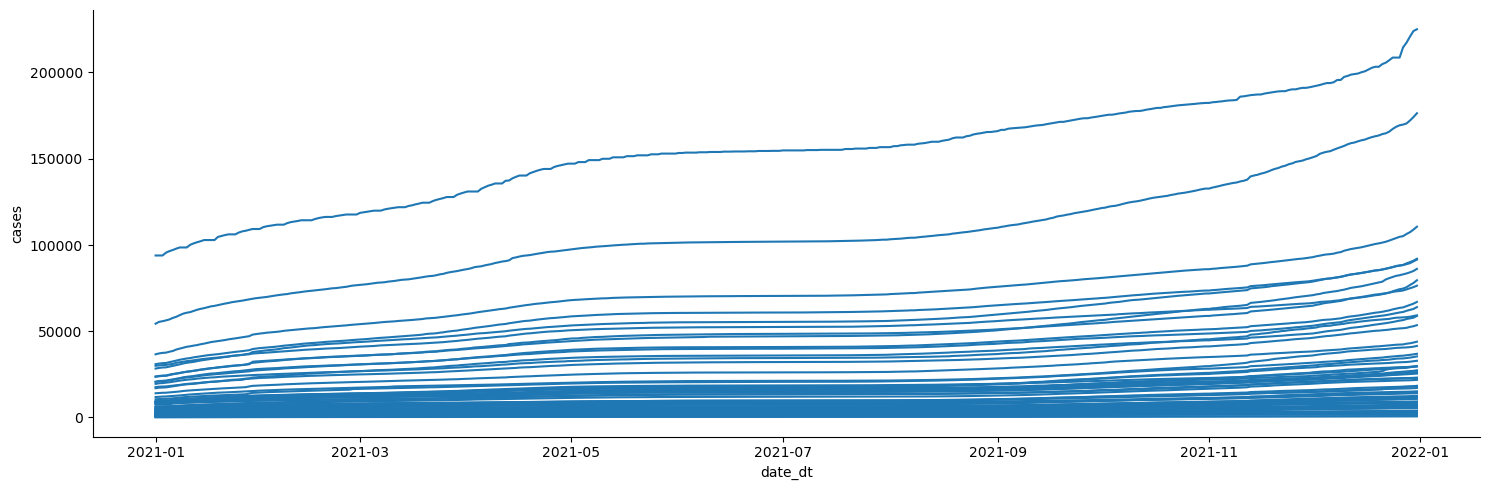

In [35]:
sns.relplot(data = pa2021, x='date_dt', y='cases', kind='line', estimator=None,
            units='county', aspect=3)

plt.show()

What if we wanted a wide-format data set storing the cumulative cases per day across all counties in PA?

In [36]:
pa2021.reset_index().loc[:, ['date_dt', 'year', 'month', 'day', 'county', 'cases']]

,date_dt,year,month,day,county,cases
0,2021-01-01,2021,1,1,Adams,4649
1,2021-01-01,2021,1,1,Allegheny,54362
2,2021-01-01,2021,1,1,Armstrong,3507
3,2021-01-01,2021,1,1,Beaver,8504
4,2021-01-01,2021,1,1,Bedford,2969
...,...,...,...,...,...,...
24450,2021-12-31,2021,12,31,Washington,35399
24451,2021-12-31,2021,12,31,Wayne,7603
24452,2021-12-31,2021,12,31,Westmoreland,59161
24453,2021-12-31,2021,12,31,Wyoming,3805


In [37]:
pa2021.reset_index().loc[:, ['date_dt', 'year', 'month', 'day', 'county', 'cases']].\
pivot(index=['date_dt', 'year', 'month', 'day'], columns='county', values='cases').\
reset_index()

county,date_dt,year,month,day,Adams,Allegheny,Armstrong,Beaver,Bedford,Berks,...,Susquehanna,Tioga,Union,Venango,Warren,Washington,Wayne,Westmoreland,Wyoming,York
0,2021-01-01,2021,1,1,4649,54362,3507,8504,2969,23758,...,1046,1926,2940,2410,1531,9084,1867,19451,808,23581
1,2021-01-02,2021,1,2,4701,55410,3565,8707,3001,24052,...,1055,1945,2953,2457,1560,9278,1951,19806,821,23874
2,2021-01-03,2021,1,3,4768,55790,3599,8751,3028,24232,...,1062,1960,2983,2491,1577,9345,1968,19933,829,24086
3,2021-01-04,2021,1,4,4786,56262,3616,8813,3042,24318,...,1068,1968,3001,2507,1586,9462,1971,20165,830,24158
4,2021-01-05,2021,1,5,4865,56827,3671,8902,3065,24820,...,1092,1986,3049,2541,1636,9567,2029,20393,838,24608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,2021,12,27,17673,169781,11640,29135,8575,73591,...,5560,6135,8855,8894,5553,34198,7381,57974,3695,82924
361,2021-12-28,2021,12,28,17786,170435,11697,29215,8595,74225,...,5605,6145,8885,8899,5556,34419,7417,58125,3709,83474
362,2021-12-29,2021,12,29,17935,172136,11754,29358,8626,74876,...,5659,6180,8922,8909,5585,34682,7456,58377,3730,84121
363,2021-12-30,2021,12,30,18097,174116,11826,29515,8699,75542,...,5702,6207,8948,8932,5594,35004,7543,58808,3764,84916


This wide format structure would not work well to store data for the entire USA! We would not be able to easily combine the data for other states!!!!!! 

What if we were interested in counties per row and days per column?

In [38]:
pa2021.reset_index().loc[:, ['year', 'month', 'day', 'state', 'county', 'cases']].\
pivot(index=['state', 'county'], columns=['year', 'month', 'day'], values='cases').\
reset_index()

year          state        county   2021                                     \
month                                  1                                      
day                                    1      2      3      4      5      6   
0      Pennsylvania         Adams   4649   4701   4768   4786   4865   4973   
1      Pennsylvania     Allegheny  54362  55410  55790  56262  56827  57708   
2      Pennsylvania     Armstrong   3507   3565   3599   3616   3671   3738   
3      Pennsylvania        Beaver   8504   8707   8751   8813   8902   9069   
4      Pennsylvania       Bedford   2969   3001   3028   3042   3065   3095   
..              ...           ...    ...    ...    ...    ...    ...    ...   
62     Pennsylvania    Washington   9084   9278   9345   9462   9567   9774   
63     Pennsylvania         Wayne   1867   1951   1968   1971   2029   2046   
64     Pennsylvania  Westmoreland  19451  19806  19933  20165  20393  20724   
65     Pennsylvania       Wyoming    808    821    829    830    838    853   
66     Pennsylvania          York  23581  23874  24086  24158  24608  25040   

year                 ...                                                  \
month                ...      12                                           
day        7      8  ...      22      23      24      25      26      27   
0       5059   5145  ...   16826   17099   17335   17482   17559   17673   
1      58372  59339  ...  164715  165659  167244  168486  169372  169781   
2       3823   3891  ...   11517   11549   11590   11616   11628   11640   
3       9185   9353  ...   28751   28847   28977   29078   29110   29135   
4       3129   3172  ...    8482    8517    8540    8569    8573    8575   
..       ...    ...  ...     ...     ...     ...     ...     ...     ...   
62      9900  10121  ...   33375   33536   33820   34057   34169   34198   
63      2111   2167  ...    7232    7250    7305    7345    7354    7381   
64     21003  21349  ...   56959   57133   57529   57796   57907   57974   
65       862    882  ...    3635    3651    3665    3682    3693    3695   
66     25349  25710  ...   79983   80756   81411   82094   82434   82924   

year                                   
month                                  
day        28      29      30      31  
0       17786   17935   18097   18341  
1      170435  172136  174116  176336  
2       11697   11754   11826   11890  
3       29215   29358   29515   29633  
4        8595    8626    8699    8761  
..        ...     ...     ...     ...  
62      34419   34682   35004   35399  
63       7417    7456    7543    7603  
64      58125   58377   58808   59161  
65       3709    3730    3764    3805  
66      83474   84121   84916   86112  

[67 rows x 367 columns]

A challenge with this setup is adding new days! But also, this dataset can only store one kind of variable! It can only store the `cases` OR the `deaths`! It cannot store both at the same time!

The long-format can!

In [39]:
pa2021.loc[:, ['year', 'month', 'day', 'state', 'county', 'cases', 'deaths']]

,year,month,day,state,county,cases,deaths
886998,2021,1,1,Pennsylvania,Adams,4649,90.0
886999,2021,1,1,Pennsylvania,Allegheny,54362,1036.0
887000,2021,1,1,Pennsylvania,Armstrong,3507,70.0
887001,2021,1,1,Pennsylvania,Beaver,8504,256.0
887002,2021,1,1,Pennsylvania,Bedford,2969,97.0
...,...,...,...,...,...,...,...
2069188,2021,12,31,Pennsylvania,Washington,35399,513.0
2069189,2021,12,31,Pennsylvania,Wayne,7603,140.0
2069190,2021,12,31,Pennsylvania,Westmoreland,59161,1121.0
2069191,2021,12,31,Pennsylvania,Wyoming,3805,89.0
